In [ ]:
!pip install transformers matplotlib numpy

In [1]:
from transformers import pipeline
import matplotlib.pyplot as plt
import numpy as np

/Users/gvsh/Github/aiplotter/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def emotional_analysis(text):
    emotion_pipeline = pipeline(
        "text-classification",
        model="ayoubkirouane/BERT-Emotions-Classifier",
        top_k=None,
    )
    results = emotion_pipeline(text)

    # Send the % of each emotion, the total sum of all emotions is 100%
    total = sum([result["score"] for result in results[0]])
    emotion_dict = {
        result["label"]: round(result["score"] * 50 / total) for result in results[0]
    }

    return emotion_dict

In [3]:
prompts = [
    "I can't wait to see what the future holds.",
    "Feeling hopeful about what's to come.",
    "Pure joy fills my heart today.",
    "That surprise totally caught me off guard!",
    "Love is the most wonderful feeling in the world.",
    "I trust that everything will work out in the end.",
    "Feeling a bit down today, but that's okay.",
    "Fear grips me when I think about the unknown.",
    "Disgusted by what I saw on the news today.",
    "Things are not looking good, feeling quite pessimistic.",
    "Anger boils inside me at the injustice of it all.",
    "Anticipation is building for the big event.",
    "Optimism is the only way forward.",
    "Bursting with happiness right now!",
    "What a pleasant surprise that was!",
    "Love is all around us, I can feel it.",
    "I have complete trust in their abilities.",
    "Feeling a bit blue today, not sure why.",
    "Fear creeps in when I think about the future.",
    "That smell makes me sick to my stomach.",
    "I just can't shake this feeling of dread.",
    "Anticipation is making it hard to focus.",
    "Optimistic about the possibilities ahead.",
    "A moment of pure joy washed over me.",
    "Surprised by the sudden turn of events.",
    "Love is the greatest force in the universe.",
    "I trust that everything will be okay.",
    "Feeling a deep sadness wash over me.",
    "Fear grips me when I think about the future.",
    "Disgusted by their behavior, I can't even...",
    "Feeling quite pessimistic about it all.",
    "Anger bubbles up at the mere thought of it.",
    "Anticipation is making me jittery.",
    "Optimistic that things will get better soon.",
    "Overwhelmed with joy at the news!",
    "That surprise brought tears to my eyes.",
    "Love is what makes life worth living.",
    "I trust that they know what they're doing.",
    "Feeling a sense of melancholy today.",
    "Fear gnaws at me when I think about it.",
    "Disgusted by the state of things.",
    "Pessimism is starting to set in.",
    "Angry about the way things turned out.",
    "Can't contain my excitement for what's coming!",
    "Optimism is my guiding light.",
    "Radiant joy fills my heart right now.",
    "What a delightful surprise that was!",
    "Love is the answer to everything.",
    "I trust in the power of positivity.",
    "Feeling a bit low today, not sure why.",
    "Fear grips me when I think about the worst-case scenario.",
    "Disgusted by the lack of respect shown.",
    "Pessimism is starting to take over.",
    "Angry at the unfairness of it all.",
    "Anticipation is making my heart race.",
    "Optimistic that things will turn around soon.",
    "Overflowing with happiness!",
    "That surprise left me speechless.",
    "Love is all we need in this world.",
    "I trust in their ability to make it right.",
    "Feeling a deep sense of loss today.",
    "Fear paralyzes me at the thought of it.",
    "Disgusted by the way they treated others.",
    "Pessimism is clouding my thoughts.",
    "Anger simmers beneath the surface.",
    "Anticipation is keeping me on edge.",
    "Optimistic about the future possibilities.",
    "Ecstatic about the news I received!",
    "That surprise was like a dream come true.",
    "Love is the most powerful force of all.",
    "I trust in the goodness of people.",
    "Feeling a bit under the weather today.",
    "Fear consumes me when I think about it.",
    "Disgusted by the lack of integrity.",
    "Pessimism is seeping into my thoughts.",
    "Angry about the injustice of the situation.",
    "Anticipation is making it hard to sit still.",
    "Optimistic that things will improve soon.",
    "Thrilled beyond words!",
    "Surprised by the unexpected turn of events.",
    "Love is what makes life beautiful.",
    "I trust in the process.",
    "Feeling a sense of longing today.",
    "Fear grips me when I think about the worst.",
    "Disgusted by the lies and deceit.",
    "Pessimism is weighing heavily on me.",
    "Angry at the way things are going.",
    "Anticipation is building to a fever pitch.",
    "Optimistic about the potential for change.",
    "Absolutely elated!",
    "That surprise brought me to tears of joy.",
    "Love is the foundation of everything.",
    "I trust in the power of love.",
    "Feeling a bit off today, not sure why.",
    "Fear creeps in when I think about the possibilities.",
    "Disgusted by the lack of compassion.",
    "Pessimism is starting to take its toll.",
    "Angry at the sheer audacity of it all.",
    "Anticipation is making my heart skip a beat.",
    "Optimistic that things will work out in the end.",
    "So incredibly happy right now!",
    "Surprised by the sheer magnitude of it all.",
    "Love is what binds us together.",
    "I trust in their ability to make things right.",
    "Feeling a profound sadness today.",
    "Fear grips me when I think about the consequences.",
    "Disgusted by the greed and selfishness.",
    "Pessimism is clouding my judgment.",
    "Angry at the way they treated others.",
    "Anticipation is making me restless.",
    "Optimistic about the possibilities that lie ahead.",
    "Absolutely overjoyed!",
    "That surprise was beyond anything I could have imagined.",
    "Love is the essence of life itself.",
    "I trust in the journey.",
    "Feeling a bit lost today, searching for direction.",
    "Fear overwhelms me when I think about the worst-case scenario.",
    "Disgusted by the lack of empathy.",
    "Pessimism is starting to color my outlook.",
    "Angry at the blatant disregard for decency.",
    "Anticipation is making me giddy with excitement.",
    "Optimistic that there are better days ahead.",
]

In [4]:
len(prompts)

122

In [ ]:
curveDict = {
    "optimism": {
        "inputVars": ["x"],
        "function": "1.0265**x",
        "bounds": ((0,170), (-100,100)),
    },
    "joy": {
        "inputVars": ["x"],
        "function": "(0.3 * (50 - abs(((x-75)/10.5)**2)))**(1/0.7)",
        "bounds": ((0,150), (-50,50)),
    },
    "anticipation": {
        "inputVars": ["x"],
        "function": "0.3*x",
        "bounds": ((0,150), (-50,50)),
    },
    "trust": {
        "inputVars": ["x"],
        "function": "np.minimum(6.25*x, np.where(6.25*(150-x) < 50, 6.25*(150-x), 50))",
        "bounds": ((0,150), (-50,50)),
    },
    "love": {
        "inputVars": ["x"],
        "function": "25*np.sin(x/24)",
        "bounds": ((-150,150), (-25,25)),
    },
    "fear": {
        "inputVars": ["x"],
        "function": "-abs((100/np.pi) * np.arcsin(np.sin(np.pi * x / 150)))",
        "bounds": ((-150,0), (-50,50)),
    },
    "pessimism": {
        "inputVars": ["x"],
        "function": "-1.0265**x",
        "bounds": ((-150,170), (-100,100)),
    },
    "sadness": {
        "inputVars": ["x"],
        "function": "-(0.3 * (50 - abs(((x-75)/10.5)**2)))**(1/0.7)",
        "bounds": ((0,150), (-50,50)),
    },
    "anger": {
        "inputVars": ["x"],
        "function": "(50/np.pi) * np.arcsin(np.sin(np.pi * x / 25))",
        "bounds": ((-50,50), (-25,25)),
    },
    "disgust": {
        "inputVars": ["x"],
        "function": "-np.minimum(6.25*x, np.where(6.25*(150-x) < 50, 6.25*(150-x), 50))",
        "bounds": ((0,150), (-50,50)),
    },
    "surprise": {
        "inputVars": ["x"],
        "function": "(25*6.8*1.9*(75-x))/((75-x)**2 + 6.8**2)",
        "bounds": ((0,150), (-25,25)),
    },
}

# Write this into json file
import json
with open('curveDict.json', 'w') as fp:
    json.dump(curveDict, fp)

In [5]:
# Read static/curveDict.json file into curveDict
import json

with open('static/curveDict.json', 'r') as fp:
    curveDict = json.load(fp)

<string>:1: RuntimeWarning: invalid value encountered in power
<string>:1: RuntimeWarning: invalid value encountered in power


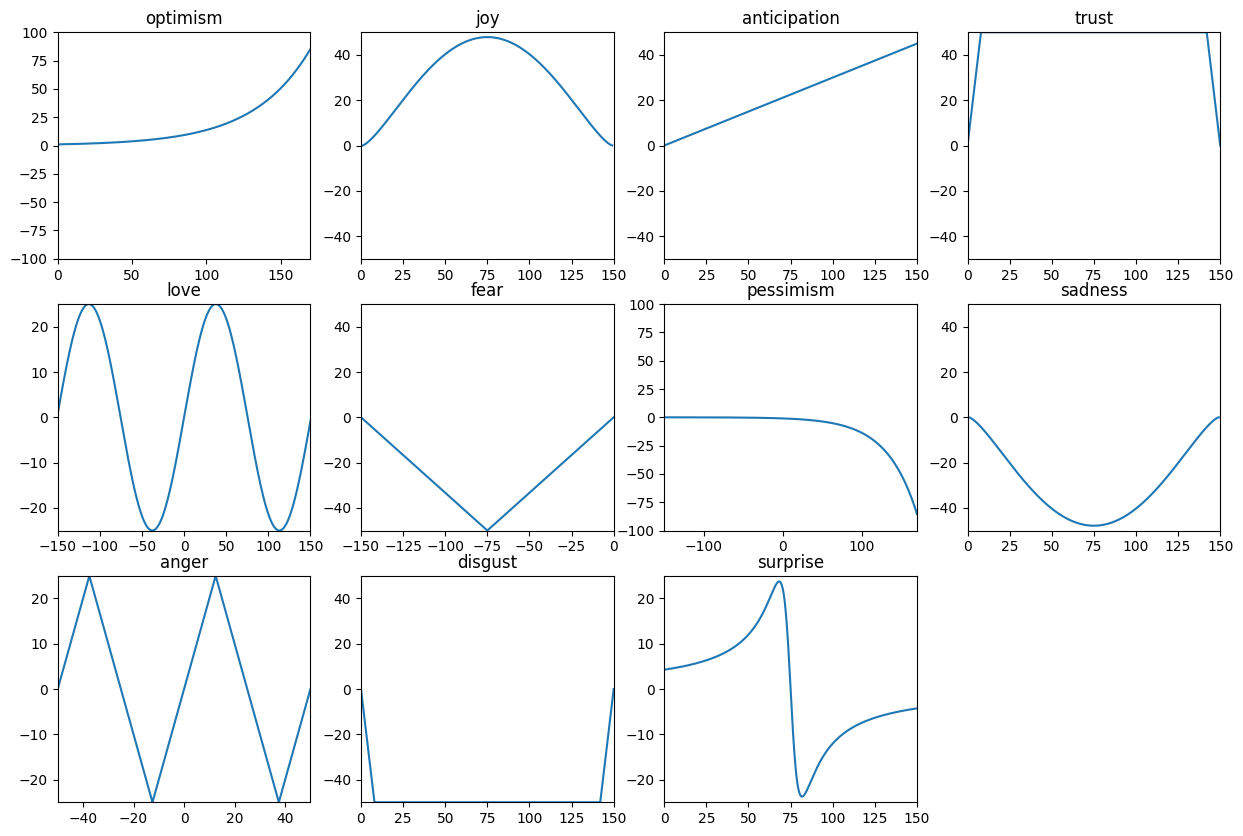

In [6]:
# Given a function and the bounds of the input variables, plot the function
def plotFunction(function, bounds, title):
    x = np.linspace(bounds[0][0], bounds[0][1], 1000)
    try: 
        y = eval(function, {"np": np, "x": x, "abs": abs, "sin": np.sin, "arcsin": np.arcsin})
    except Exception as e:
        print(f"Error while evaluating function {function}: {e}")
        return
    plt.plot(x, y)
    # Set the bounds of the plot
    plt.xlim(bounds[0])
    plt.ylim(bounds[1])
    plt.title(title)

# Given a dictionary of functions, plot all the functions
def plotAllFunctions(curveDict):
    # In separate subplots, plot each function
    for i, (emotion, data) in enumerate(curveDict.items()):
        plt.subplot(3, 4, i+1)
        plotFunction(data["function"], data["bounds"], emotion)
    plt.show()

plt.figure(figsize=(15, 10))
plotAllFunctions(curveDict)

In [ ]:
def curve(emotions, curveDict, w=300, h=100):
    import matplotlib.pyplot as plt
    import numpy as np

    X = np.linspace(0, 300, 100)
    Y = []

    emotions = {k: emotions[k] for k in curveDict.keys()}

    for emotion, score in emotions.items():
        bounds_x, bounds_y = curveDict[emotion]["bounds"]
        xsteps = 20

        x = np.linspace(bounds_x[0], bounds_x[1], xsteps)
        y = eval(
            curveDict[emotion]["function"], {"np": np, "abs": abs, "min": min}, {"x": x} 
        ) if score > 0 else np.zeros(xsteps)

        y = np.interp(y, (bounds_y[0], bounds_y[1]), (-2.5, 2.5))

        # Append the y, 'score' times to the Y list
        for i in range(int(score)):
            # Concatenate the y values to the Y list
            Y = np.concatenate((Y, y))

    X = np.linspace(0, 1000, len(Y))
    
    return X,Y

In [ ]:
def curve(emotions, curveDict, w=770, h=2290):
    import matplotlib.pyplot as plt
    import numpy as np

    # Initial empty lists for X and Y values
    Y = []

    emotions = {k: emotions[k] for k in curveDict.keys()}

    for emotion, score in emotions.items():
        bounds_x, bounds_y = curveDict[emotion]["bounds"]
        xsteps = w//50

        x = np.linspace(bounds_x[0], bounds_x[1], xsteps)
        y = eval(
            curveDict[emotion]["function"], {"np": np, "abs": abs, "min": min}, {"x": x}
        ) if score > 0 else np.zeros(xsteps)

        # Map the y range to -2.5 to 2.5
        y = np.interp(y, (bounds_y[0], bounds_y[1]), (-2.5, 2.5))

        # Instead of appending 'score' times, consider weighting the Y values by score
        for i in range(int(score)):
            Y.append(y)
    
    # Resize X,Y to the desired dimensions 
    X = np.linspace(0, w, 1000)
    Y = np.array(Y).flatten()
    Y.resize(h, w)

    return X, Y


In [7]:
def curve(emotions, curveDict, w=770, h=2290):
    import numpy as np

    # Generate X with a fixed resolution
    X = np.linspace(0, w, 1000)  # 1000 points along the width

    # Initialize Y as zeros - ensures it matches X in length
    Y = []

    for emotion, score in emotions.items():
        # Only process if score > 0 to avoid unnecessary computations
        if score > 0:
            bounds_x, bounds_y = curveDict[emotion]["bounds"]
            xsteps = len(X)//50  # Use the length of X to determine the steps
            
            # Generate x values within the bounds for the current emotion
            x = np.linspace(bounds_x[0], bounds_x[1], xsteps)
            
            # Calculate y values based on the function defined in curveDict
            y = eval(curveDict[emotion]["function"], {"np": np, "abs": abs, "min": min}, {"x": x})

            # If there is any NaN value in y, replace it with 0
            y = np.nan_to_num(y)
            
            y = np.interp(y, (bounds_y[0], bounds_y[1]), (-2.5, 2.5))
            
            # Append the y values to Y based on the score: If score=1, append y once; if score=2, append y twice, and so on
            for i in range(int(score)):
                Y.extend(y)

    # Convert Y to a numpy array and reshape it to match the desired dimensions
    Y = np.array(Y).flatten()
    Y.resize(w)

    X = np.linspace(0, w, len(Y))
    X.resize(w)

    return X, Y

In [ ]:
# Sad prompt 
prompt = prompts[0]
emotions = emotional_analysis(prompt)
X, Y = curve(emotions, curveDict)

len(X), len(Y)

In [8]:
plt.figure(figsize=(20, 0.5))

# Interpolate the curve by a factor of 10
plt.plot(X, Y)

plt.show()

# Show the emotions in the same order as the curveDict
emotions

NameError: name 'X' is not defined

<Figure size 2000x50 with 0 Axes>

<string>:1: RuntimeWarning: invalid value encountered in power
<string>:1: RuntimeWarning: invalid value encountered in power
<string>:1: RuntimeWarning: invalid value encountered in power
<string>:1: RuntimeWarning: invalid value encountered in power
<string>:1: RuntimeWarning: invalid value encountered in power
<string>:1: RuntimeWarning: invalid value encountered in power
<string>:1: RuntimeWarning: invalid value encountered in power
<string>:1: RuntimeWarning: invalid value encountered in power
<string>:1: RuntimeWarning: invalid value encountered in power
<string>:1: RuntimeWarning: invalid value encountered in power
<string>:1: RuntimeWarning: invalid value encountered in power
<string>:1: RuntimeWarning: invalid value encountered in power
<string>:1: RuntimeWarning: invalid value encountered in power
<string>:1: RuntimeWarning: invalid value encountered in power
<string>:1: RuntimeWarning: invalid value encountered in power
<string>:1: RuntimeWarning: invalid value encountered i

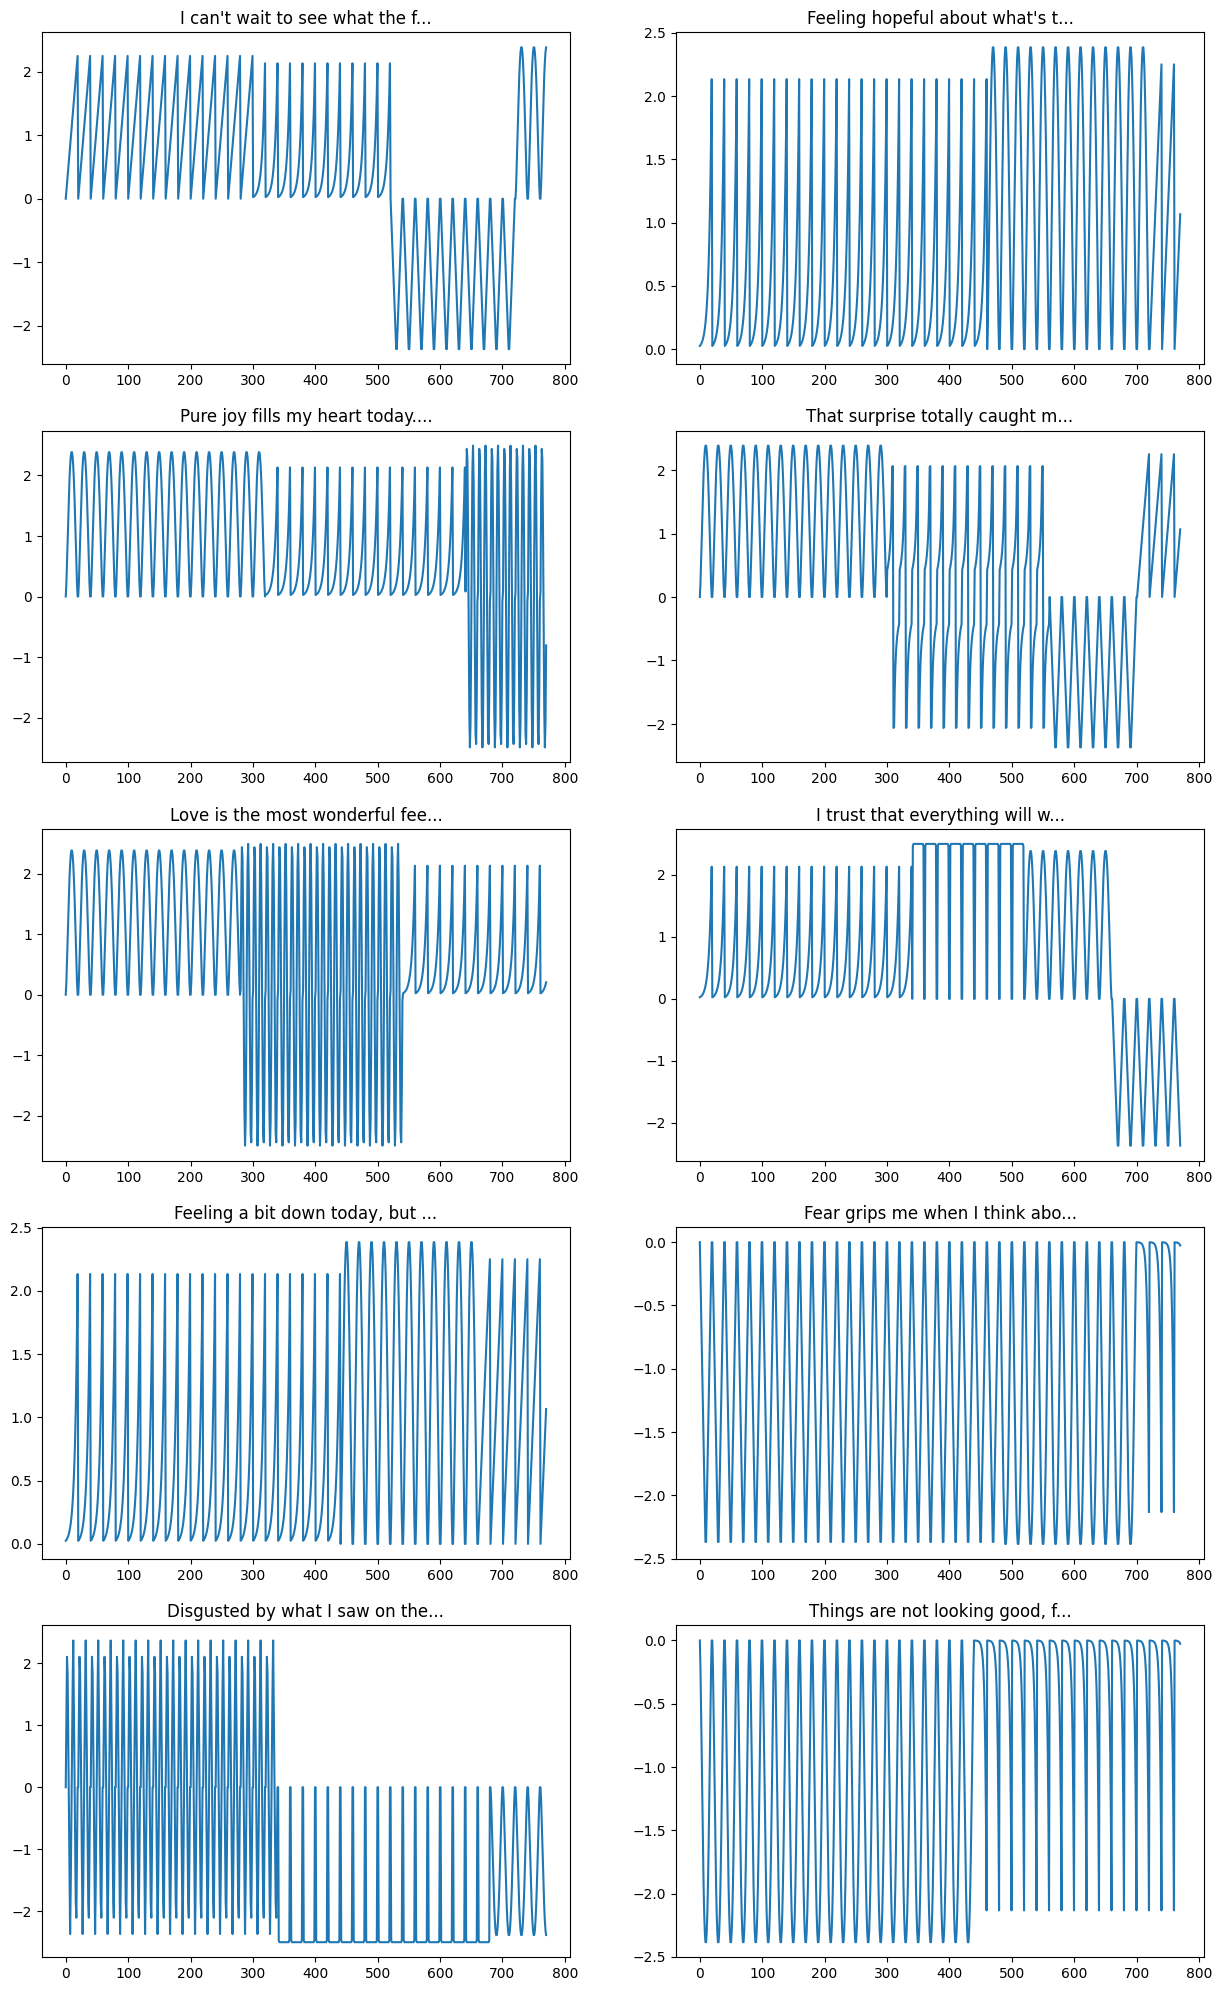

In [9]:
def plot_subplots(prompts, curveDict):
    fig, axs = plt.subplots(5, 2, figsize=(15, 25))

    for i in range(5):
        for j in range(2):
            emotions = emotional_analysis(prompts[i*2+j])
            X, Y = curve(emotions, curveDict)
            axs[i, j].plot(X, Y)
            axs[i, j].set_title(prompts[i*2+j][:30] + "...")

    plt.show()

plot_subplots(prompts, curveDict)

<string>:1: RuntimeWarning: invalid value encountered in power
<string>:1: RuntimeWarning: invalid value encountered in power
<string>:1: RuntimeWarning: invalid value encountered in power
<string>:1: RuntimeWarning: invalid value encountered in power
<string>:1: RuntimeWarning: invalid value encountered in power
<string>:1: RuntimeWarning: invalid value encountered in power
<string>:1: RuntimeWarning: invalid value encountered in power
<string>:1: RuntimeWarning: invalid value encountered in power
<string>:1: RuntimeWarning: invalid value encountered in power
<string>:1: RuntimeWarning: invalid value encountered in power
<string>:1: RuntimeWarning: invalid value encountered in power
<string>:1: RuntimeWarning: invalid value encountered in power
<string>:1: RuntimeWarning: invalid value encountered in power
<string>:1: RuntimeWarning: invalid value encountered in power
<string>:1: RuntimeWarning: invalid value encountered in power
<string>:1: RuntimeWarning: invalid value encountered i

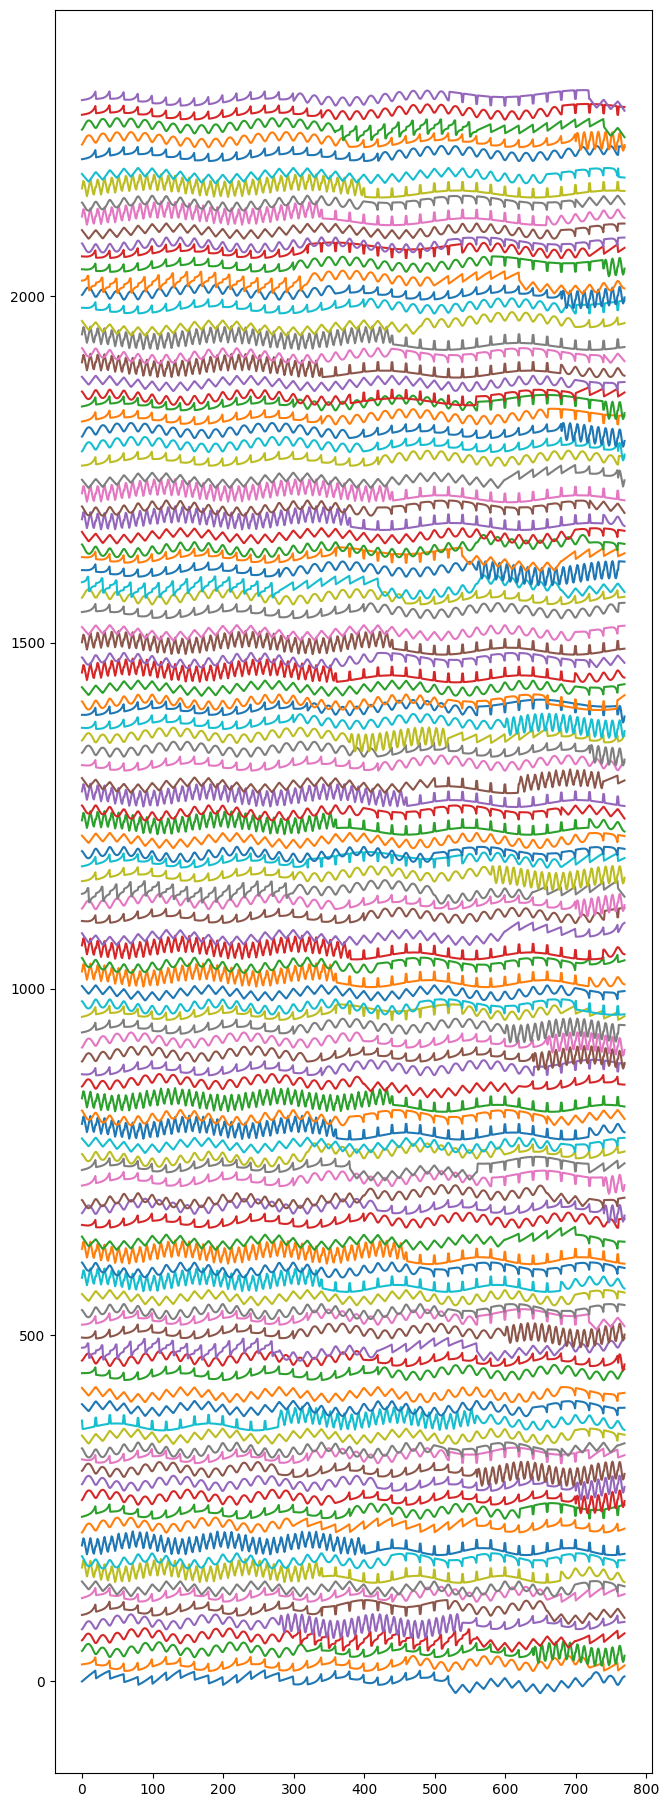

In [10]:
import matplotlib.pyplot as plt
import numpy as np

w,h = 770, 2290

fig = plt.figure(figsize=(w/100, h/100))

x = np.linspace(0, w, 1000)

# for i in range(0, h, 20):
#   period = np.interp(i, [0, h], [18, 36])
#   y = np.sin((x + i) / period) * 5 + i
#   plt.plot(x, y)

def get_sine_wave(i, w = 770, h = 2290):
    x = np.linspace(0, w, w)
    period = np.interp(i, [0, h], [18, 36])
    # Create values for the y-axis
    y = np.sin((x + i) / period) * 5 + i
    return x, y

j = 0
for i in range(0, h, 20):
    x, y = get_sine_wave(i)
    emotions = emotional_analysis(prompts[j])
    X, Y = curve(emotions, curveDict)

    y += Y * 5
    
    plt.plot( y)
    j += 1
    if j == len(prompts) - 1:
        break

plt.show()

In [11]:
def generate_gcode(points, filename="output.gcode", feed_rate=1000):
    """
    Generate a GCode file from a set of points.

    Args:
    - points (list of tuple): List of (x, y) tuples representing the points.
    - filename (str): Name of the GCode file to be written.
    - feed_rate (int): Feed rate for drawing movements.
    """
    with open(filename, 'w') as file:
        # Header
        file.write("G21 ; Set units to mm\n")
        file.write("G90 ; Absolute positioning\n")
        
        # Optionally, lift the pen up with G0 Z1.0 here if working with a pen plotter
        
        # Move to the starting point without drawing
        start_point = points[0]
        file.write(f"G0 X{start_point[0]} Y{start_point[1]}\n")
        
        # Optionally, lower the pen down with G0 Z0.0 here if working with a pen plotter

        # Draw to each subsequent point
        for x, y in points[1:]:
            file.write(f"G1 X{x} Y{y} F{feed_rate}\n")

        # Optionally, lift the pen up again at the end with G0 Z1.0
        
        # Footer or end commands can be added here

    print(f"GCode file '{filename}' has been generated.")


In [12]:
# Take an prompt and generate a GCode file
def generate_gcode_from_prompt(i, prompt, curveDict, filename="output.gcode", feed_rate=1000):
    emotions = emotional_analysis(prompt)
    X, Y = curve(emotions, curveDict)

    # If the Y value are NaN, replace them with 0
    Y = np.nan_to_num(Y)

    # Get the sine wave
    x, y = get_sine_wave(i)
    # Add the emotion curve to the sine wave
    y += Y * 5
    points = list(zip(X, y))
    generate_gcode(points, filename, feed_rate)

generate_gcode_from_prompt(0, prompts[5], curveDict)

GCode file 'output.gcode' has been generated.


<string>:1: RuntimeWarning: invalid value encountered in power
<string>:1: RuntimeWarning: invalid value encountered in power
